# Consumer Complaint Resolution Analysis Using Python


Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load given datasets

In [2]:
train_data = pd.read_csv("Datasets/Consumer_Complaints_train.csv")
test_data = pd.read_csv("Datasets/Consumer_Complaints_test.csv")

Print top 5 records of train dataset

In [3]:
train_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


Print top 5 records of test dataset

In [4]:
test_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


Print shape of train and test datasets 

In [5]:
print(train_data.shape)
print(test_data.shape)

(358810, 18)
(119606, 17)


Print columns of train and test datasets

In [6]:
print('Columns of train data')
print(train_data.columns)
print('\nColumns of test data')
print(test_data.columns)

Columns of train data
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

Columns of test data
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


Check data type for both datasets

In [7]:

# Check data types for train data
print("Data types for train data:")
print(train_data.dtypes)

# Check data types for test data
print("\nData types for test data:")
print(test_data.dtypes)

Data types for train data:
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

Data types for test data:
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    obj

Print missing values in percentage

In [8]:
# Calculate percentage of missing values in train data
train_missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100

# Calculate percentage of missing values in test data
test_missing_percentage = (test_data.isnull().sum() / len(test_data)) * 100

# Print missing values percentage for train data
print("Missing values percentage for train data:")
print(train_missing_percentage)

# Print missing values percentage for test data
print("\nMissing values percentage for test data:")
print(test_missing_percentage)


Missing values percentage for train data:
Date received                    0.000000
Product                          0.000000
Sub-product                     28.925058
Issue                            0.000000
Sub-issue                       61.139322
Consumer complaint narrative    84.342688
Company public response         81.067696
Company                          0.000000
State                            0.809063
ZIP code                         0.811293
Tags                            86.002062
Consumer consent provided?      71.689752
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64

Missing values percentage for test data:
Date received                    0.000000
Product                          0.000000
Sub-product                     28.997709
Issue              

Drop columns where more than 25% of the data are missing.

In [9]:
# Drop columns with missing values exceeding 25% from train data
train_data = train_data.drop(train_missing_percentage[train_missing_percentage > 25].index, axis=1)

# Drop columns with missing values exceeding 25% from test data
test_data = test_data.drop(test_missing_percentage[test_missing_percentage > 25].index, axis=1)

# Display the updated train and test data
print("Train data after dropping columns with more than 25% missing values:")
print(train_data.head())

print("\nTest data after dropping columns with more than 25% missing values:")
print(test_data.head())

Train data after dropping columns with more than 25% missing values:
  Date received                  Product  \
0    2015-10-14         Credit reporting   
1    2015-04-26  Bank account or service   
2    2013-12-20              Credit card   
3    2016-03-03          Debt collection   
4    2015-01-30          Debt collection   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                                     Company State ZIP code Submitted via  \
0                                    Equifax    GA    30134           Web   
1                      Wells Fargo & Company    GA    319XX           Web   
2                                   Citibank    SC    29203         Phone   
3       FAIR COLLECTIONS & OUTSOURCING, INC.    OH    43082      Referral   
4  HCFS He

Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

In [10]:
# Convert 'Date received' column in train data to datetime format
train_data['Date received'] = pd.to_datetime(train_data['Date received'])

# Extract year, month, and day into separate columns
train_data['Year received'] = train_data['Date received'].dt.year
train_data['Month received'] = train_data['Date received'].dt.month
train_data['Day received'] = train_data['Date received'].dt.day

print(train_data)


# Convert 'Date received' column in test data to datetime format
test_data['Date received'] = pd.to_datetime(test_data['Date received'])

# Extract year, month, and day into separate columns
test_data['Year received'] = test_data['Date received'].dt.year
test_data['Month received'] = test_data['Date received'].dt.month
test_data['Day received'] = test_data['Date received'].dt.day

test_data.head()

       Date received                  Product  \
0         2015-10-14         Credit reporting   
1         2015-04-26  Bank account or service   
2         2013-12-20              Credit card   
3         2016-03-03          Debt collection   
4         2015-01-30          Debt collection   
...              ...                      ...   
358805    2014-04-14         Credit reporting   
358806    2013-03-14                 Mortgage   
358807    2013-02-01              Credit card   
358808    2015-06-25          Debt collection   
358809    2015-05-12         Credit reporting   

                                           Issue  \
0         Incorrect information on credit report   
1                       Deposits and withdrawals   
2                                          Other   
3                Disclosure verification of debt   
4                Disclosure verification of debt   
...                                          ...   
358805    Incorrect information on credit repor

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year received,Month received,Day received
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7


Convert dates from object type to datetime type

In [11]:
# Convert 'Date sent to company' column in train data to datetime format
train_data['Date sent to company'] = pd.to_datetime(train_data['Date sent to company'])

# Convert 'Date sent to company' column in test data to datetime format
test_data['Date sent to company'] = pd.to_datetime(test_data['Date sent to company'])

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [12]:
# Calculate the number of days the complaint was with the company
train_data['Days held'] = (train_data['Date sent to company'] - train_data['Date received']).dt.days


test_data['Days held'] = (test_data['Date sent to company'] - test_data['Date received']).dt.days




Convert "Days Held" to Int(above column)

In [13]:
# Convert "Days Held" column to integer type
train_data['Days held'] = train_data['Days held'].astype(int)


test_data['Days held'] = test_data['Days held'].astype(int)

train_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year received,Month received,Day received,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20,14
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30,0


Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [14]:
# Drop specified columns from train_data
train_data.drop(columns=['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], inplace=True)

# If you want to include both train and test data:
test_data.drop(columns=['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], inplace=True)


Impute null values in "State" by Mode 
(find mode and replace nan value)

In [15]:
# Calculate the mode of the "State" column
mode_state_train = train_data['State'].mode()[0]

# Impute null values in the "State" column with the mode
train_data['State'].fillna(mode_state_train, inplace=True)

mode_state_test = test_data['State'].mode()[0]

test_data['State'].fillna(mode_state_test, inplace=True)


Check Missing Values in the dataset

In [16]:
# Check for missing values in the train_data dataset
missing_values_train = train_data.isnull().sum()
print("Missing values in train_data:")
print(missing_values_train)

# If you want to check for missing values in the test_data dataset:
missing_values_test = test_data.isnull().sum()
print("\nMissing values in test_data:")
print(missing_values_test)


Missing values in train_data:
Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Year received                   0
Month received                  0
Day received                    0
Days held                       0
dtype: int64

Missing values in test_data:
Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Year received                   0
Month received                  0
Day received                    0
Days held                       0
dtype: int64


Categorize Days into Weeks with the help of 'Days Received'

In [17]:
# Define the bins for categorizing days into weeks
bins = [-float('inf'), 7, 14, 21, 28, float('inf')]
labels = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5+']

# Categorize days into weeks
train_data['Weeks received'] = pd.cut(train_data['Day received'], bins=bins, labels=labels, right=False)

# If you want to include both train and test data:
test_data['Weeks received'] = pd.cut(test_data['Day received'], bins=bins, labels=labels, right=False)




Drop "Day_Received" column

In [18]:
# Drop the "Day received" column from train_data
train_data.drop(columns=['Day received'], inplace=True)

# If you want to include both train and test data:
test_data.drop(columns=['Day received'], inplace=True)


Print head of train and test dataset and observe

In [19]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year received,Month received,Days held,Weeks received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,Week 3
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,Week 4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,Week 3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,Week 1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,Week 5+


In [20]:
test_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year received,Month received,Days held,Weeks received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,Week 3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,Week 4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0,Week 1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,3,Week 3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,0,Week 2


Store data of the disputed consumer in the new data frame as "disputed_cons"

In [21]:

disputed_cons = train_data[train_data['Consumer disputed?'] == 'Yes'].copy()



Plot bar graph for the total no of disputes with the help of seaborn

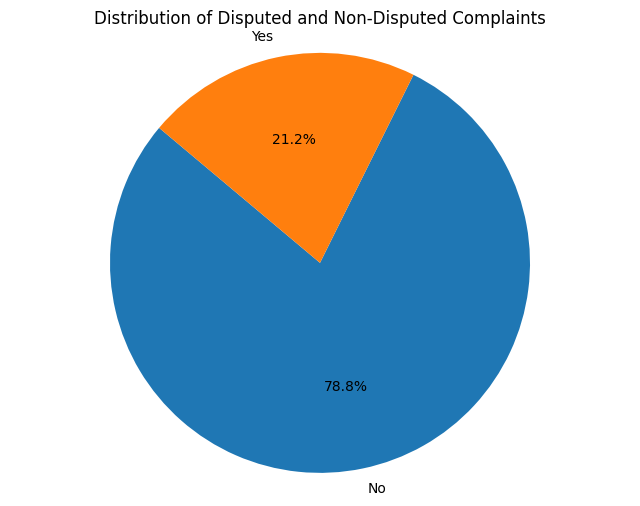

In [22]:
# Count the number of disputes
dispute_counts = train_data['Consumer disputed?'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(dispute_counts, labels=dispute_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Disputed and Non-Disputed Complaints')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Plot bar graph for the total no of disputes products-wise with help of seaborn

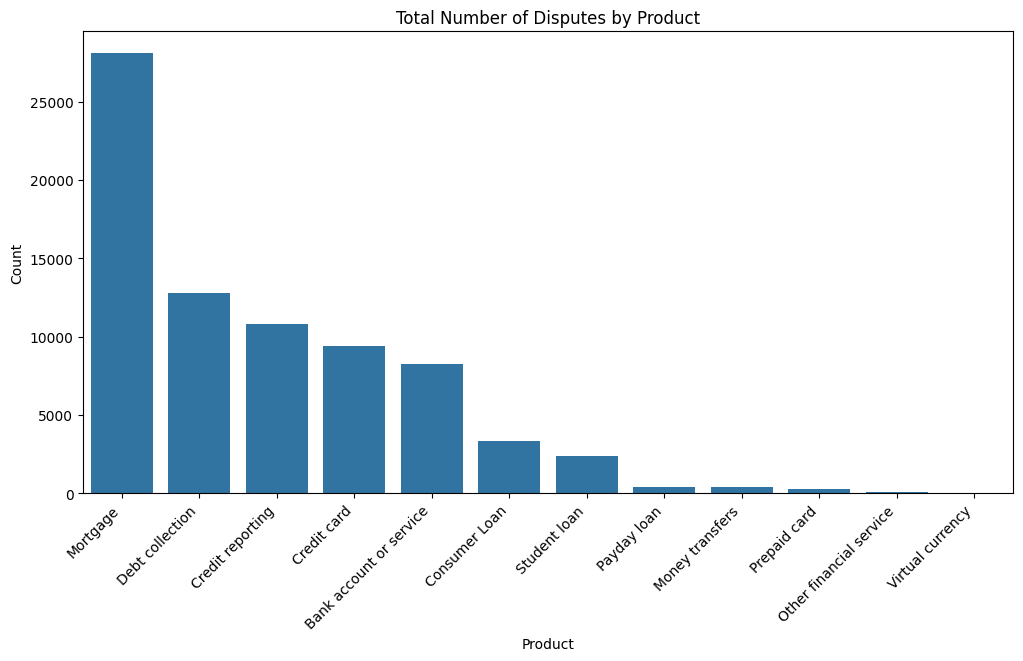

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product', data=disputed_cons, order=disputed_cons['Product'].value_counts().index)
plt.title('Total Number of Disputes by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

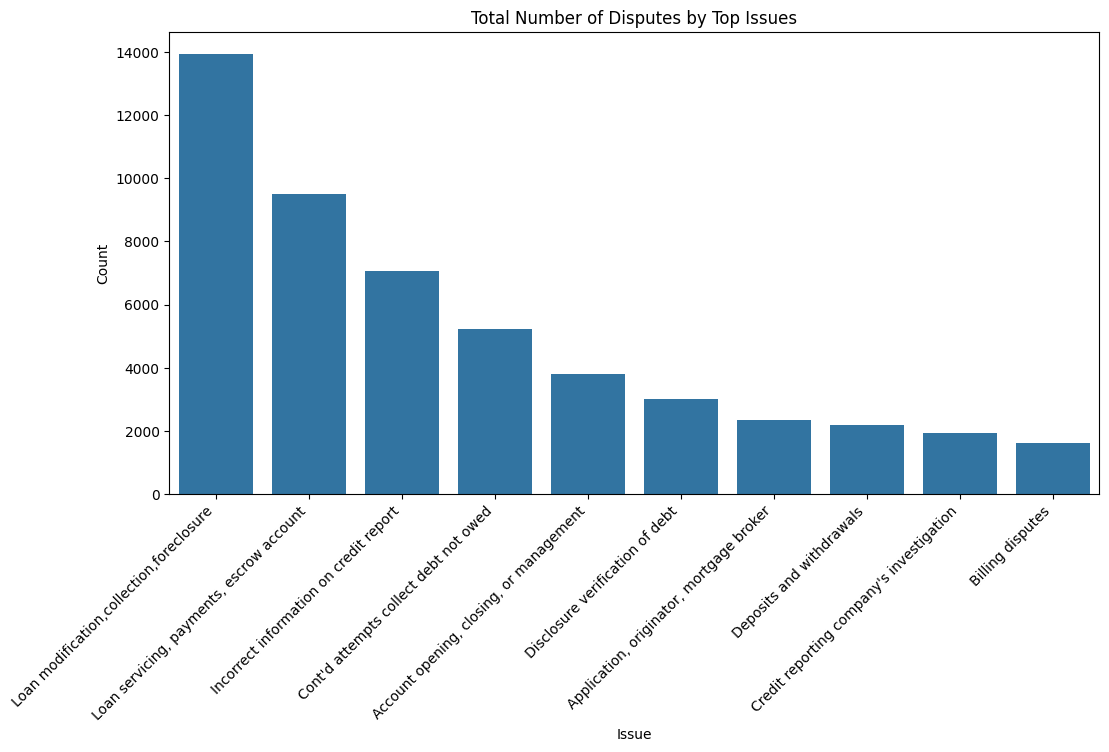

In [24]:
# Find the top issues by highest disputes
top_issues = disputed_cons['Issue'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_issues.index, y=top_issues.values, order=top_issues.index)
plt.title('Total Number of Disputes by Top Issues')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Plot bar graph for the total no of disputes by top 20 States with Maximum Disputes

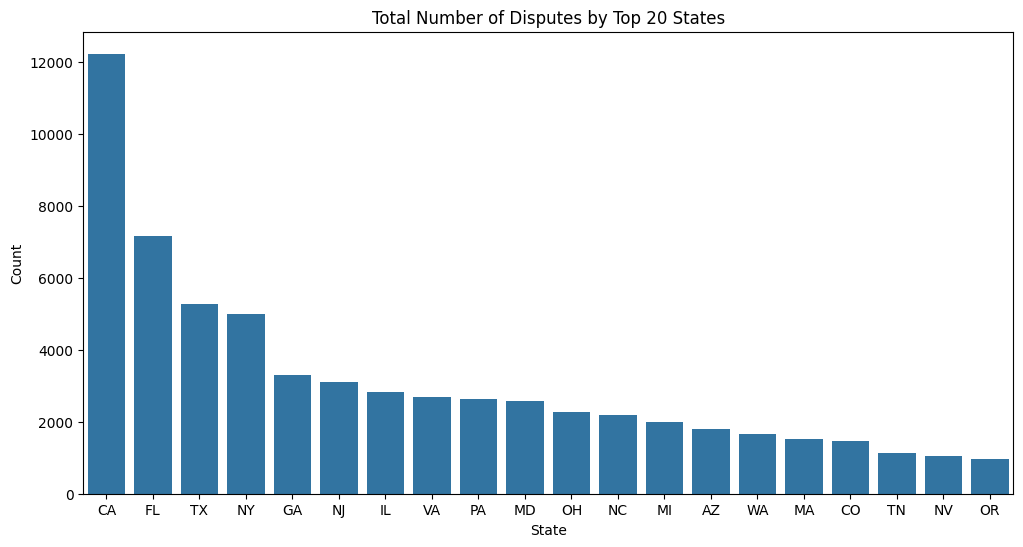

In [25]:
# Find the top 10 states with the highest number of disputes
top_20_states = disputed_cons['State'].value_counts().head(20).index

# Filter the DataFrame to include only data related to the top 10 states
top_20_states_data = disputed_cons[disputed_cons['State'].isin(top_20_states)]

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=top_20_states_data, order=top_20_states)
plt.title('Total Number of Disputes by Top 20 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')
plt.show()

Plot bar graph for the total no of disputes by Submitted Via diffrent source 

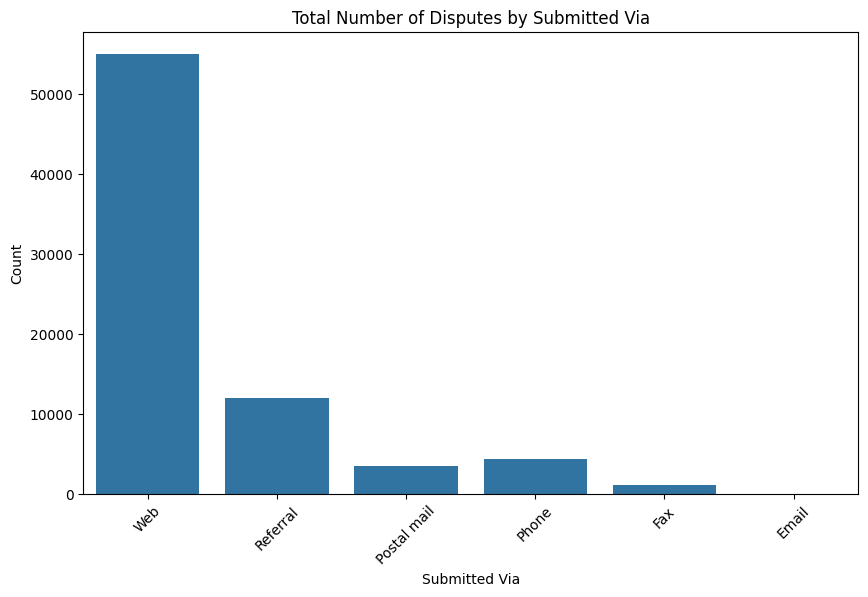

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Submitted via', data=disputed_cons)
plt.title('Total Number of Disputes by Submitted Via')
plt.xlabel('Submitted Via')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Plot bar graph for the total no of disputes where Company's Response to the Complaints

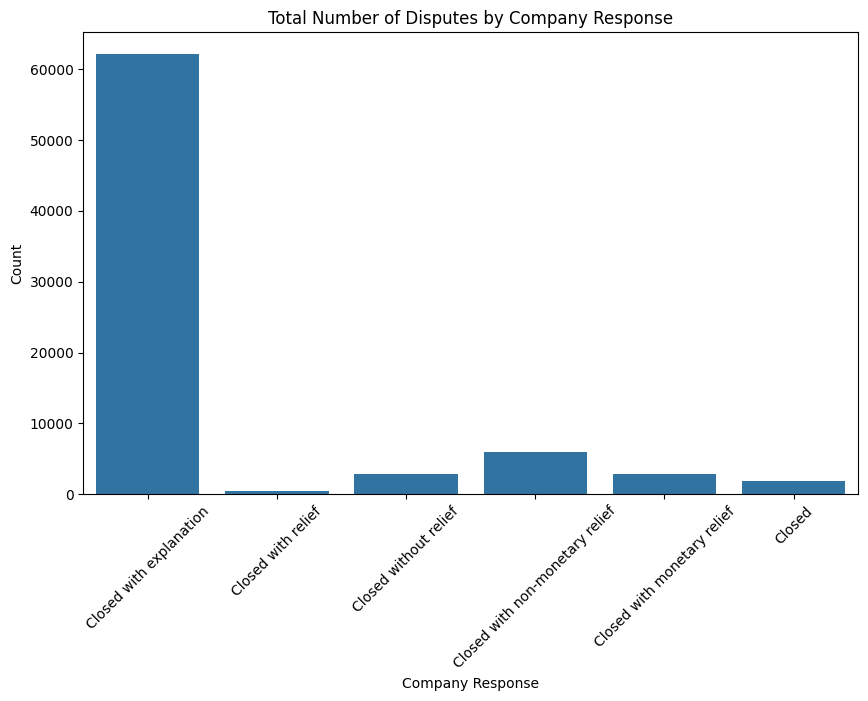

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Company response to consumer', data=disputed_cons)
plt.title('Total Number of Disputes by Company Response')
plt.xlabel('Company Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

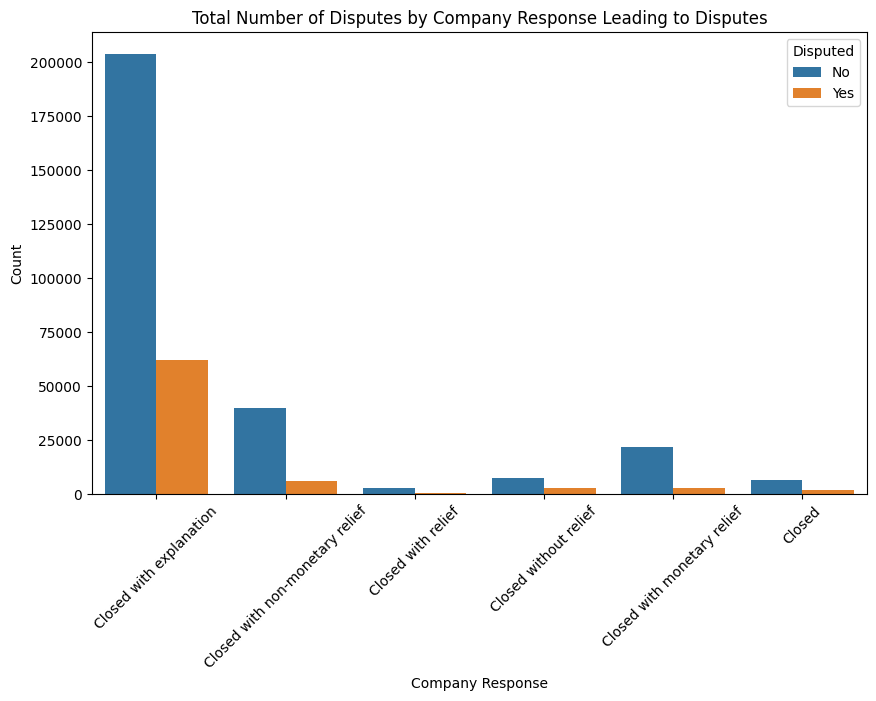

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Company response to consumer', hue='Consumer disputed?', data=train_data)
plt.title('Total Number of Disputes by Company Response Leading to Disputes')
plt.xlabel('Company Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Disputed', loc='upper right')
plt.show()

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

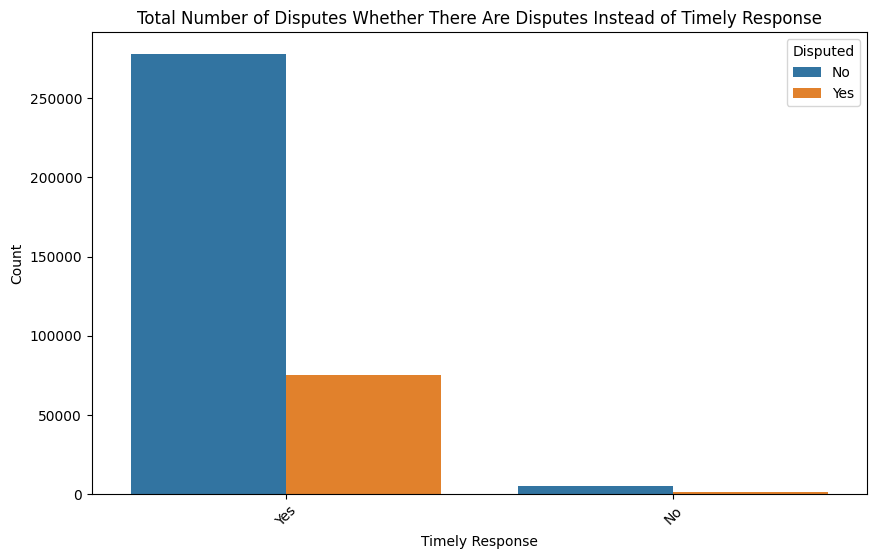

In [29]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Timely response?', hue='Consumer disputed?', data=train_data)
plt.title('Total Number of Disputes Whether There Are Disputes Instead of Timely Response')
plt.xlabel('Timely Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Disputed', loc='upper right')
plt.show()


Plot bar graph for the total no of disputes over Year Wise Complaints

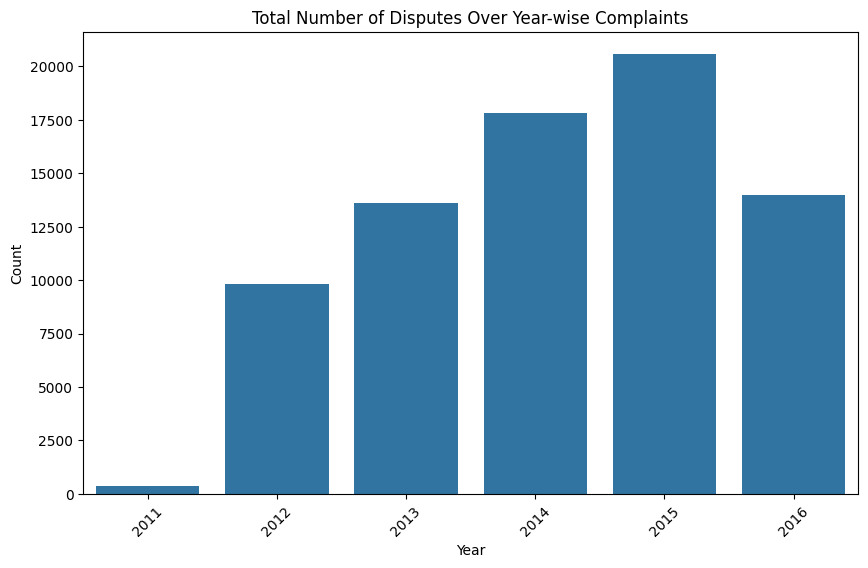

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year received',  data=disputed_cons)
plt.title('Total Number of Disputes Over Year-wise Complaints')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

Plot  bar graph for the top companies with highest complaints

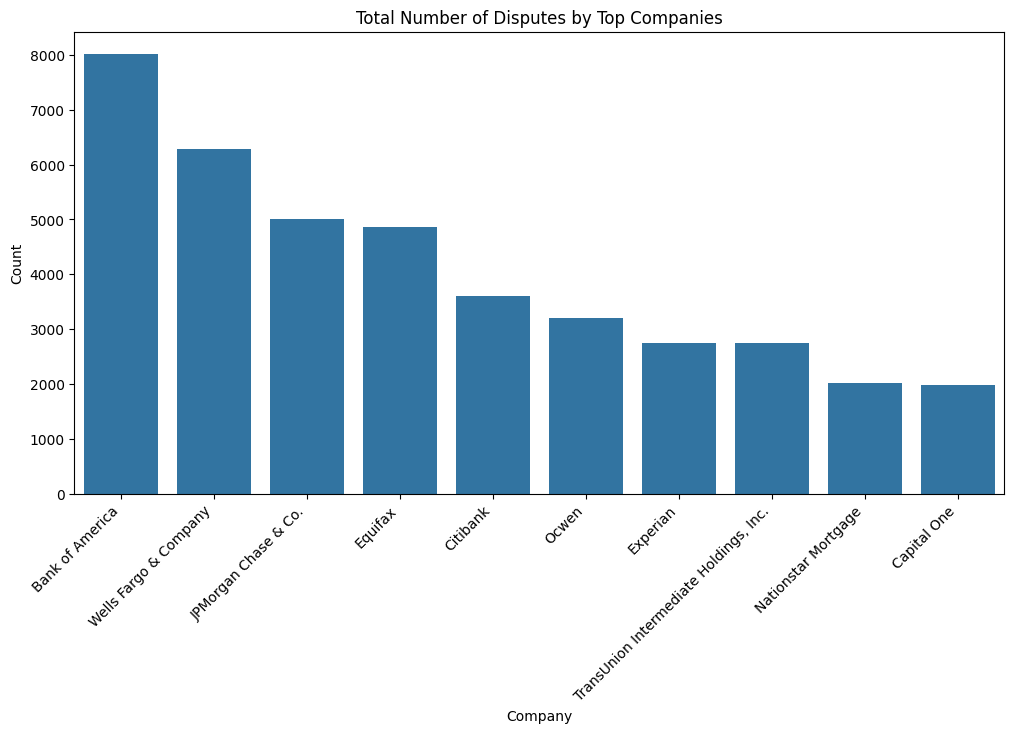

In [31]:
# Find the top companies with the highest number of complaints
top_companies = disputed_cons['Company'].value_counts().head(10).index

# Filter the DataFrame to include only data related to the top companies
top_companies_data = disputed_cons[disputed_cons['Company'].isin(top_companies)]

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='Company', data=top_companies_data, order=top_companies)
plt.title('Total Number of Disputes by Top Companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

"Days Held" Column Analysis(describe)

In [32]:
days_held_description = disputed_cons['Days held'].describe()
print(days_held_description)


count    76172.000000
mean         3.638962
std         14.254591
min         -1.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        631.000000
Name: Days held, dtype: float64


Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [33]:
# Convert negative values in the "Days Held" column to zero
disputed_cons['Days held'] = disputed_cons['Days held'].apply(lambda x: max(0, x))


In [34]:
train_data

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year received,Month received,Days held,Weeks received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,Week 3
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,Week 4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,Week 3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,Week 1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,Week 5+
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,-1,Week 3
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,4,Week 3
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,0,Week 1
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,4,Week 4


Some Packages

In [35]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Samapan
[nltk_data]     Kar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Samapan
[nltk_data]     Kar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Samapan
[nltk_data]     Kar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text pre-processing using NLP

In [36]:
relevant_text_train = train_data['Issue']
relevant_text_test = test_data['Issue']

# tokenize the datasets
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))

# remove punctutions
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))

# filtering stopwords
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)

# lemmatizing the datasets
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))

# Stemming the datasets
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))

# making sentences joining the stemmed words
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [37]:
# importing necessary libraries
from collections import Counter

# checking all the tokenized words and total count of them
all_words_train = Counter([word for sentence in tokenized_data_train for word in sentence])
all_words_test = Counter([word for sentence in tokenized_data_test for word in sentence])

print("Total number of unique words in training data: ", len(all_words_train))
print("Total number of unique words in test data: ", len(all_words_test))

# checking the most common words in the training data
print("Most common words in training data: ", all_words_train.most_common())

# checking the most common words in the test data
print("Most common words in test data: ", all_words_test.most_common())

Total number of unique words in training data:  201
Total number of unique words in test data:  200
Most common words in training data:  [(',', 253982), ('loan', 113938), ('credit', 75055), ('account', 61863), ('collection', 61295), ('modification', 60185), ('foreclosure', 60185), ('or', 53281), ('report', 51612), ('incorrect', 43924), ('information', 43825), ('on', 43825), ('payments', 41961), ('debt', 41370), ("'", 39149), ('servicing', 38456), ('escrow', 38456), ('/', 31791), ('not', 28096), ('cont', 27266), ('d', 27266), ('attempts', 27266), ('collect', 27266), ('owed', 27266), ('closing', 21209), ('of', 20828), ('opening', 18124), ('management', 17557), ('and', 17184), ('my', 15920), ('disclosure', 12283), ('verification', 12283), ('communication', 11457), ('tactics', 11457), ('deposits', 11028), ('withdrawals', 11028), ('problems', 10173), ('to', 10156), ('unable', 9725), ('lease', 9497), ('other', 9160), ('the', 9029), ('application', 8680), ('billing', 8542), ('originator', 844

Replacing the new processed data column

In [38]:
train_data['Issues_cleaned'] = clean_data_train
test_data['Issues_cleaned'] = clean_data_test
train_data = train_data.drop('Issue', axis = 1)
test_data = test_data.drop('Issue', axis = 1)

In [39]:
train_data

,Product,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year received,Month received,Days held,Weeks received,Issues_cleaned
0,Credit reporting,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,Week 3,incorrect inform on credit report
1,Bank account or service,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,Week 4,deposit and withdraw
2,Credit card,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,Week 3,other
3,Debt collection,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,Week 1,disclosur verif of debt
4,Debt collection,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,Week 5+,disclosur verif of debt
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,-1,Week 3,incorrect inform on credit report
358806,Mortgage,Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,4,Week 3,loan modif collect foreclosur
358807,Credit card,Capital One,TX,Web,Closed,Yes,Yes,2013,2,0,Week 1,payoff process
358808,Debt collection,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,4,Week 4,cont d attempt collect debt not owe


Drop Unnecessary Columns for the Model Building

In [40]:
# Define the list of columns to be dropped
columns_to_drop = ['Company', 'State', 'Year received', 'Days held']

# Drop the unnecessary columns
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [41]:
train_data['Consumer disputed?'] = train_data['Consumer disputed?'].replace({'Yes': 1, 'No': 0})
train_data.head()

,Product,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month received,Weeks received,Issues_cleaned
0,Credit reporting,Web,Closed with explanation,Yes,0,10,Week 3,incorrect inform on credit report
1,Bank account or service,Web,Closed with explanation,Yes,1,4,Week 4,deposit and withdraw
2,Credit card,Phone,Closed with non-monetary relief,Yes,0,12,Week 3,other
3,Debt collection,Referral,Closed with explanation,Yes,0,3,Week 1,disclosur verif of debt
4,Debt collection,Web,Closed with explanation,Yes,1,1,Week 5+,disclosur verif of debt


Create Dummy Variables for catagorical features

In [42]:
# List of categorical features
categorical_features = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?','Weeks received']

# Create dummy variables for categorical features
dummy_variables_train = pd.get_dummies(train_data[categorical_features],dtype=int)
dummy_variables_test = pd.get_dummies(test_data[categorical_features],dtype=int)

Concate Dummy Variables and Drop the Original Columns

In [43]:
# Concatenate the dummy variables with the original DataFrame
train_data = pd.concat([train_data, dummy_variables_train], axis=1)

# Drop the original categorical columns
train_data.drop(columns=categorical_features, inplace=True)

# Concatenate the dummy variables with the original DataFrame
test_data = pd.concat([test_data, dummy_variables_test], axis=1)

# Drop the original categorical columns
test_data.drop(columns=categorical_features, inplace=True)

In [44]:
train_data.head()

,Consumer disputed?,Month received,Issues_cleaned,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes,Weeks received_Week 1,Weeks received_Week 2,Weeks received_Week 3,Weeks received_Week 4,Weeks received_Week 5+
0,0,10,incorrect inform on credit report,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,4,deposit and withdraw,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,12,other,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,3,disclosur verif of debt,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,1,disclosur verif of debt,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


Calculating TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(train_data['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(test_data['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
#weights.head()
weights

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672
...,...
modif,2.782596
account,2.745228
credit,2.628233
collect,2.396302


Replacing Issues_cleaned by Vectorized Issues

In [47]:
train_data = train_data.drop('Issues_cleaned', axis = 1)
test_data = test_data.drop('Issues_cleaned', axis = 1)
train_data = pd.concat([train_data, issues_train], axis = 1)
test_data = pd.concat([test_data, issues_test], axis = 1)
Feature168 = [0] * 119606
test_data['Feature168'] = Feature168

In [48]:
train_data.head()

,Consumer disputed?,Month received,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,10,0,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,4,1,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,0,12,0,0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,3,0,0,0,0,1,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,1,0,0,0,0,1,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [49]:
test_data.head()

,Month received,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,9,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,5,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.406735,0.0,0.0,0.0,0.0,0.413484,0.0,0
4,7,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0


Observe Shape of new Train and Test Datasets

In [50]:
print(train_data.shape)
print(test_data.shape)

(358810, 201)
(119606, 200)


Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
X = train_data.iloc[:,1:]
y = train_data.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)



# Initialize the StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

test_data_scaled = scaler.transform(test_data)


Do feature selection with help of PCA

In [53]:
from sklearn.decomposition import PCA

In [54]:
# Initialize PCA with n_components=None to retain all components
pca = PCA(n_components=None)

# Fit PCA on the scaled training data
pca.fit(X_train)
X_train.shape

(269107, 200)

Select top features which are covering 80% of the information 
(n=53),
<br>store this data into new dataframe,

In [55]:
# Calculate cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to cover 80% of the information
n_components = np.argmax(cumulative_variance >= 0.8) + 1

# Initialize PCA with the selected number of components
pca = PCA(n_components=n_components)

# Fit PCA on the scaled training data
pca.fit(X_train)

# Transform the training and testing data using the selected number of components
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
test_data_scaled_pca = pca.transform(test_data_scaled)

# Get the top n features
top_n_features = pca.components_[:n_components, :]

# Create a new DataFrame with the top features
top_features_df = pd.DataFrame(top_n_features, columns=X.columns)

# Optionally, you can concatenate the PCA-transformed features with the dependent variable (if needed)
top_features_df = pd.concat([y, top_features_df], axis=1)

Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)

In [56]:
print(X_train_pca)
print(X_test_pca)

[[-0.0640992   1.46052567 -0.05612901 ... -0.18958915 -1.3531758
  -0.88859501]
 [-1.11811661  1.80327013 -1.168135   ...  0.14008018 -1.50619004
  -0.85275759]
 [-2.28020846 -0.58750716 -1.46896278 ...  0.16338302 -0.29885256
   1.84987306]
 ...
 [-0.88615026 -0.04854548 -0.85504269 ...  0.58859564 -1.99567808
  -0.954028  ]
 [ 5.39759913 -2.25486155 -1.17691363 ...  0.57337521 -0.36747828
   1.8849768 ]
 [-1.11098337  1.80279023 -1.16366759 ...  0.00566347 -0.45431071
  -0.75256891]]
[[-0.21153008 -0.51802201  1.42625095 ... -0.16753435  1.22206517
  -0.48762032]
 [-0.07119346  1.85353562  0.01347941 ...  0.69378404 -1.75633545
  -0.99370549]
 [ 0.0727956   0.34225368  0.37724538 ... -0.01082927  0.72795885
  -0.70998578]
 ...
 [-2.28898975 -0.59950066 -1.48018816 ...  0.09983915 -0.26014756
  -0.65286156]
 [-0.33203367  0.633575   -0.27339142 ... -1.22574593  0.33234159
   0.06806782]
 [-2.27630088 -0.58465491 -1.47661571 ... -1.22295983  0.00384575
   0.02822526]]


Shapes of the datasets

In [57]:
X_train_pca.shape,X_test_pca.shape,y_train.shape,y_test.shape

((269107, 56), (89703, 56), (269107,), (89703,))

# Model Building & Evaluation Metrics

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, f1_score

Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train_pca,y_train)

y_test_pred = logistic_regression_model.predict(X_test_pca)

logistic_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", logistic_accuracy)

Accuracy: 0.7879223660301217


In [61]:
# Calculate ROC AUC score (if it's a binary classification problem)
roc_auc = roc_auc_score(y_test, y_test_pred)
print("ROC AUC Score:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)

ROC AUC Score: 0.5
Confusion Matrix:
[[70679     0]
 [19024     0]]
F1 Score: 0.0


Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
# Initialize the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier()

# Train the model on the training data
decision_tree_model.fit(X_train_pca, y_train)

# Predict on the validation set
y_test_pred = decision_tree_model.predict(X_test_pca)

# Calculate validation accuracy
decision_tree_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", decision_tree_accuracy)

Accuracy: 0.7750019508823562


In [64]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[68951  1728]
 [18455   569]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87     70679
           1       0.25      0.03      0.05     19024

    accuracy                           0.78     89703
   macro avg       0.52      0.50      0.46     89703
weighted avg       0.67      0.78      0.70     89703

F1 Score: 0.053374607194784485


Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Initialize the Random Forest Classifier model
random_forest_model = RandomForestClassifier()

# Train the model on the training data
random_forest_model.fit(X_train_pca, y_train)

# Predict on the validation set
y_test_pred = random_forest_model.predict(X_test_pca)

# Calculate validation accuracy
random_forest_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", random_forest_accuracy)

Accuracy: 0.7745114433185066


In [67]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[68841  1838]
 [18389   635]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     70679
           1       0.26      0.03      0.06     19024

    accuracy                           0.77     89703
   macro avg       0.52      0.50      0.47     89703
weighted avg       0.68      0.77      0.70     89703

F1 Score: 0.0590780108852398


AdaBoost Classifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
# Initialize the AdaBoost Classifier model
adaboost_model = AdaBoostClassifier()

# Train the model on the training data
adaboost_model.fit(X_train_pca, y_train)

# Predict on the validation set
y_test_pred = adaboost_model.predict(X_test_pca)

# Calculate validation accuracy
ada_boost_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", ada_boost_accuracy)

c:\Users\Samapan Kar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7879112181309432


In [70]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[70678     1]
 [19024     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     70679
           1       0.00      0.00      0.00     19024

    accuracy                           0.79     89703
   macro avg       0.39      0.50      0.44     89703
weighted avg       0.62      0.79      0.69     89703

F1 Score: 0.0


Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
# Initialize the Gradient Boosting Classifier model
gradient_boosting_model = GradientBoostingClassifier()

# Train the model on the training data
gradient_boosting_model.fit(X_train_pca, y_train)

# Predict on the validation set
y_test_pred = gradient_boosting_model.predict(X_test_pca)

# Calculate validation accuracy
gradient_boosting_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", gradient_boosting_accuracy)

Accuracy: 0.7879112181309432


In [73]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[70676     3]
 [19022     2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     70679
           1       0.40      0.00      0.00     19024

    accuracy                           0.79     89703
   macro avg       0.59      0.50      0.44     89703
weighted avg       0.71      0.79      0.69     89703

F1 Score: 0.00021020547585264595


KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Initialize the KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=7,weights='distance')

# Fit the model to the training data
knn_model.fit(X_train_pca, y_train)

# Predict the labels of the test data
y_test_pred = knn_model.predict(X_test_pca)

# Calculate the accuracy of the model
knn_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", knn_accuracy)

Accuracy: 0.7555154231185133


In [76]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[66213  4466]
 [17465  1559]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     70679
           1       0.26      0.08      0.12     19024

    accuracy                           0.76     89703
   macro avg       0.53      0.51      0.49     89703
weighted avg       0.68      0.76      0.70     89703

F1 Score: 0.12447602698710528


XGBoost Classifier

In [77]:
from xgboost import XGBClassifier

In [78]:
# Initialize the XGBoost classifier model
xgb_model = XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train_pca, y_train)

# Predict the labels of the test data
y_test_pred = xgb_model.predict(X_test_pca)

# Calculate the accuracy of the model
xgboost_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", xgboost_accuracy)

Accuracy: 0.7871308651884552


In [79]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[70541   138]
 [18957    67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     70679
           1       0.33      0.00      0.01     19024

    accuracy                           0.79     89703
   macro avg       0.56      0.50      0.44     89703
weighted avg       0.69      0.79      0.70     89703

F1 Score: 0.006968641114982578


Plotting

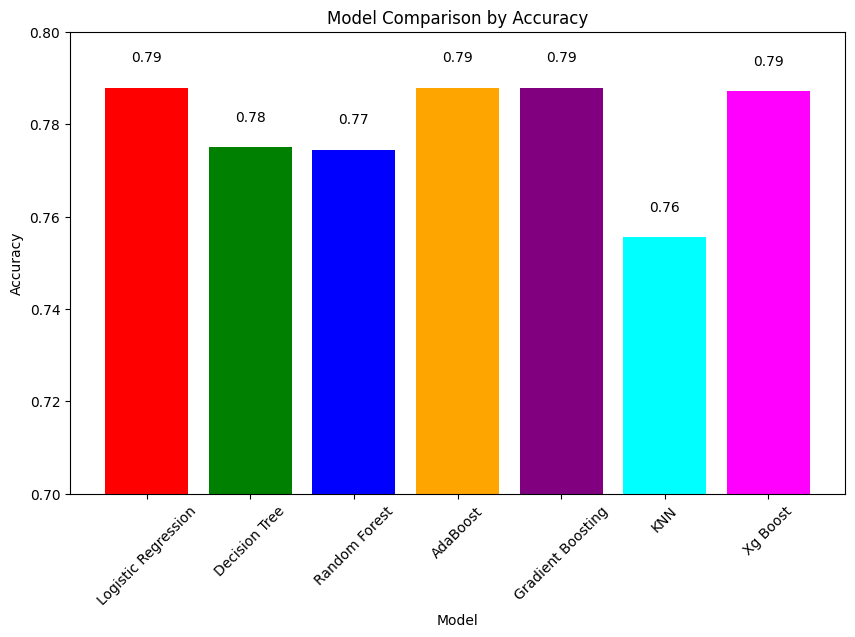

In [83]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting','KNN', 'Xg Boost']
accuracies = [logistic_accuracy, decision_tree_accuracy, random_forest_accuracy, ada_boost_accuracy, gradient_boosting_accuracy, knn_accuracy, xgboost_accuracy]

# Assigning colors to bars
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']

plt.figure(figsize=(10, 6))

# Create a bar plot with custom colors and rotated x-axis labels
bars = plt.bar(models, accuracies, color=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Add data labels
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{accuracy:.2f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison by Accuracy')
plt.ylim(0.7, 0.8)
plt.show()


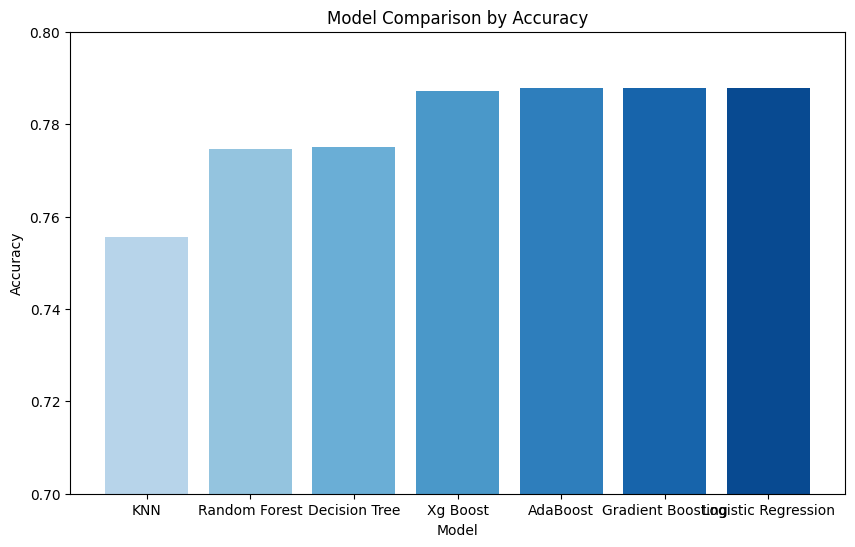

In [84]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting','KNN', 'Xg Boost']

# Accuracy scores for each model
accuracies = [logistic_accuracy, decision_tree_accuracy, random_forest_accuracy, ada_boost_accuracy, gradient_boosting_accuracy, knn_accuracy, xgboost_accuracy]

# Combine models and accuracies into a list of tuples, sort by accuracy
model_acc_pairs = sorted(zip(models, accuracies), key=lambda x: x[1])

# Unzip the sorted pairs back into separate lists
sorted_models, sorted_accuracies = zip(*model_acc_pairs)

# Generate a color gradient from light blue to dark blue
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(sorted_models)))

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(sorted_models, sorted_accuracies, color=colors)  # Create bar plot with color gradient
plt.xlabel('Model')  # Set x-axis label
plt.ylabel('Accuracy')  # Set y-axis label
plt.title('Model Comparison by Accuracy')  # Set title
plt.ylim(0.7, 0.8)  # Set the limit for the y-axis
plt.show()

SVM Classifier

In [77]:
from sklearn.svm import SVC

In [78]:
# Initialize the SVM classifier model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train_pca, y_train)

# Predict the labels of the test data
y_test_pred = svm_model.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7879223660301217


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

Logistic Regression Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to search
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    #'C' : np.logspace(-4, 4, 20),
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

# Initialize the GridSearchCV object with the logistic regression model and parameter grid
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=True, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the test set
y_test_pred = best_model.predict(X_test_pca)

# Calculate accuracy of the best model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


KeyboardInterrupt: 

AdaBoost Classifier Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.001, 0.01, 0.1, 1],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # AdaBoost algorithm
}

# Initialize the GridSearchCV object with the AdaBoost Classifier and parameter grid
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the test set
y_test_pred = best_model.predict(X_test_pca)

# Calculate accuracy of the best model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Samapan Kar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Samapan Kar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Samapan Kar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Samapan Kar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R alg

KeyboardInterrupt: 